# Scalar Fields: normals

## [Run this notebook on binder](https://mybinder.org/v2/gh/daavoo/pyntcloud/master)

In this notebook we are going to learn about the avaliable scalar fields that require the normals of each point.

# Imports

In [1]:
from pyntcloud import PyntCloud

---

# Load ankylosaurus mesh

We are going to load a 3D model of an ankylosaurus from the provided `examples/data.`

You could load other point cloud in any of the supported [point cloud formats](http://pyntcloud.readthedocs.io/en/latest/io.html).

You can learn more about reading and writing point clouds in the `examples/[io]` notebooks.

In [2]:
anky = PyntCloud.from_file("data/ankylosaurus_mesh.ply")
anky

PyntCloud
34820 points with 6 scalar fields
69636 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: 0.029972486197948456, 1.1250594854354858, 2.887650489807129
Other attributes:

From the description, we can see that this is a 3D mesh with 69636 faces. 

---

# Visualization: Mesh


We can visualize the mesh with the `plot` method.

Note that we are passing the argument `backend="threejs"` because mesh visualziation is not currently supported with the default backend. 

Because of this, the visualization might don't work in some enviroments (i.e. binder). We are working to add support to mesh plotting with the default backend as soon as possible  in order to fix these issues.

In [ ]:
anky.plot(mesh=True, backend="threejs")

![mesh](data/images/structures-voxelgrid-1.png)

---

# Convert Mesh to Point Cloud using random sampling.

We can now convert the mesh into a point cloud by sampling 100.000 random points from the surface.

You cand learn more about hoy to convert a triangular mesh into a point cloud in the `examples/[sampling]` notebooks.

In [3]:
anky_cloud = anky.get_sample("mesh_random", n=100000, rgb=True, normals=True, as_PyntCloud=True)

Note that we pass the `normals=True` argument so now our point cloud has normal values for each point:

---

# Visualization: Pandas built-in

Because PyntCloud.points is a pandas.DataFrame, we can leverage the built-in [visualization options of pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html):

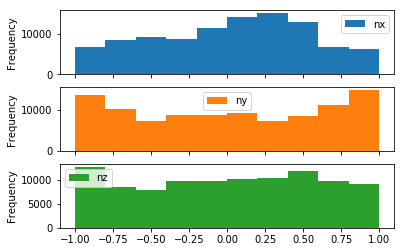

In [4]:
anky_cloud.points[["nx", "ny", "nz"]].plot(kind="hist", subplots=True);

---

# Visualization: Point Cloud

We can visualize the sampled point cloud as follows:

In [ ]:
anky_cloud.plot()

![anky_cloud](data/images/structures-voxelgrid-2.png)

---

# Inclination (Degrees)

$\huge I_d = \arccos (N_z) \times \frac{180}\pi{}$

In [5]:
inclination_degrees = anky_cloud.add_scalar_field("inclination_degrees")

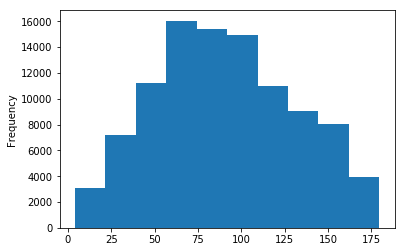

In [6]:
anky_cloud.points[inclination_degrees].plot(kind="hist");

In [ ]:
anky_cloud.plot(use_as_color=inclination_degrees, cmap="jet")

![inclination_degrees](data/images/scalar_fields-normals-1.png)

---

# Inclination (Radians)

$\huge I_r = \arccos (N_z)$

In [7]:
inclination_radians = anky_cloud.add_scalar_field("inclination_radians")

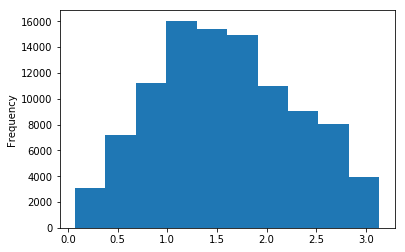

In [8]:
anky_cloud.points[inclination_radians].plot(kind="hist");

In [ ]:
anky_cloud.plot(use_as_color=inclination_radians, cmap="jet")

![inclination_radians](data/images/scalar_fields-normals-2.png)

---

# Orientation (Degrees)

$\huge O_d = \arctan (N_x, N_y) \times \frac{180}\pi{}$

In [9]:
orientation_degrees = anky_cloud.add_scalar_field("orientation_degrees")

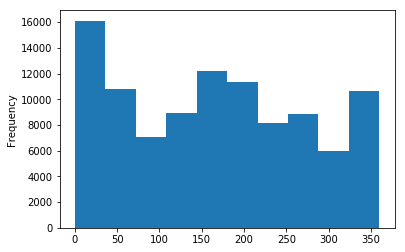

In [10]:
anky_cloud.points[orientation_degrees].plot(kind="hist");

In [ ]:
anky_cloud.plot(use_as_color=orientation_degrees, cmap="jet")

![orientation_degrees](data/images/scalar_fields-normals-3.png)

---

# Orientation (radians)

$\huge O_r = \arctan (N_x, N_y)$

In [11]:
orientation_radians = anky_cloud.add_scalar_field("orientation_radians")

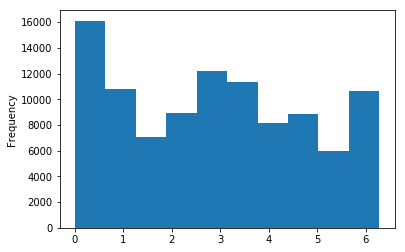

In [12]:
anky_cloud.points[orientation_radians].plot(kind="hist");

In [ ]:
anky_cloud.plot(use_as_color=orientation_radians, cmap="jet")

![orientation_radians](data/images/scalar_fields-normals-4.png)